In [ ]:
url = "https://storage.googleapis.com/doggies-doggies/amazon_cells_labelled.txt"
import pandas as pd
import sklearn
from sklearn import feature_extraction
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

dataset = pd.read_csv(url, delimiter = "\t", names = ['Reviews', 'Class'])


In [ ]:
dataset.head(10)

,Reviews,Class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dataset['Reviews'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, dataset['Class'], test_size=0.20, random_state=5)

In [ ]:
from pickle import FALSE

from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB(alpha = 4)
MNB.fit(X_train, Y_train)

MultinomialNB(alpha=4)

In [ ]:






from sklearn import metrics
predicted = MNB.predict(X_test)

accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [ ]:

print(str('{:04.2f}'.format(accuracy_score*100))+'%')


77.00%


In [ ]:
# Now trying TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (1,1))
text_count_2 = tfidf.fit_transform(dataset['Reviews'])

#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, dataset['Class'],test_size=0.20,random_state=5)
print(dataset['Reviews'].shape)
print(x_test.shape)
print(text_count_2.shape)

(1000,)
(200, 1847)
(1000, 1847)


In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB(alpha = 2 )
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test),y_test)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

BNB accuracy = 82.00%


In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train.todense(), y_train)
accuracy_score_gnb = metrics.accuracy_score(GNB.predict(x_test.todense()), y_test)
print('accuracy_score_gnb = '+str('{:4.2f}'.format(accuracy_score_gnb*100))+'%')

accuracy_score_gnb = 68.50%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
from sklearn.naive_bayes import ComplementNB
#Fitting the model
CNB = ComplementNB(alpha = 2 , norm = True
                )
CNB.fit(x_train, y_train)
accuracy_score = metrics.accuracy_score(CNB.predict(x_test),y_test)

print(str('{:4.2f}'.format(accuracy_score*100))+'%')

82.50%


In [ ]:
MNB.fit(x_train, y_train)


MultinomialNB(alpha=4)

In [ ]:
text_count_2

pred = MNB.predict(x_test)

accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 83.50%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

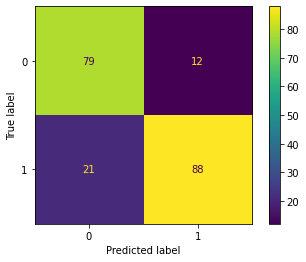

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()


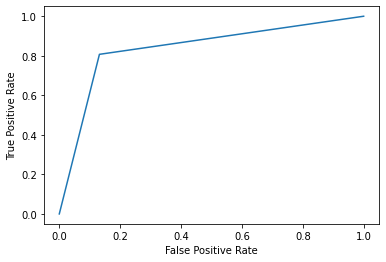

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
import numpy as np
import os
from os import system as sys

sliced = dataset[0:50]


In [ ]:

labels = dataset['Class']
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (1,1))
text_count_3 = tfidf.fit_transform( dataset['Reviews'])
x_test = text_count_3[0:150]
y_test = labels[0:150]
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
print(sliced['Reviews'].shape)
print(x_test.shape)
print(text_count_3.shape)
rev = dataset['Reviews']

(50,)
(150, 1847)
(1000, 1847)


Project requires examples of errors, so we will probe for errors with the following

In [ ]:
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
preds = MNB.predict(x_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')
j = 0
for i in y_test.iteritems():
  print("-----------------------------------")
  print("Actual: " + str(i[1]) )
  print("Predicted: " + str(preds[j]))
  j= j + 1

accuracy_score_mnb = 93.33%
-----------------------------------
Actual: 0
Predicted: 0
-----------------------------------
Actual: 1
Predicted: 1
-----------------------------------
Actual: 1
Predicted: 1
-----------------------------------
Actual: 0
Predicted: 0
-----------------------------------
Actual: 1
Predicted: 1
-----------------------------------
Actual: 0
Predicted: 0
-----------------------------------
Actual: 0
Predicted: 0
-----------------------------------
Actual: 1
Predicted: 0
-----------------------------------
Actual: 0
Predicted: 0
-----------------------------------
Actual: 0
Predicted: 0
-----------------------------------
Actual: 1
Predicted: 1
-----------------------------------
Actual: 1
Predicted: 0
-----------------------------------
Actual: 0
Predicted: 0
-----------------------------------
Actual: 1
Predicted: 1
-----------------------------------
Actual: 0
Predicted: 0
-----------------------------------
Actual: 1
Predicted: 1
----------------------------

In [ ]:
mapp = {0: 'Negative Sentiment', 1: 'Positive Sentiment'}
preds = np.vectorize(mapp.get)(preds)
y_test = np.vectorize(mapp.get)(y_test)

In [ ]:
i = 7
print("-----------------")
print("The following sentence was misclassified:")
print()
print(rev[i].strip())
print()
print("Actual: " + str(y_test[i]) )
print("Predicted: " + str(preds[i]) )
print()
#############
i = 11
print("-----------------")
print("The following sentence was misclassified:")
print()
print(rev[i].strip())
print()
print("Actual: " + str(y_test[i]) )
print("Predicted: " + str(preds[i]) )
print()
#############
i = 23
print("-----------------")
print("The following sentence was misclassified:")
print()
print(rev[i].strip())
print()
print("Actual: " + str(y_test[i]) )
print("Predicted: " + str(preds[i]) )
print()
#############
i = 30
print("-----------------")
print("The following sentence was misclassified:")
print()
print(rev[i].strip())
print()
print("Actual: " + str(y_test[i]) )
print("Predicted: " + str(preds[i]) )
print()
#############
i = 33
print("-----------------")
print("The following sentence was misclassified:")
print()
print(rev[i].strip())
print()
print("Actual: " + str(y_test[i]) )
print("Predicted: " + str(preds[i]) )
print()
#############
i = 34
print("-----------------")
print("The following sentence was misclassified:")
print()
print(rev[i].strip())
print()
print("Actual: " + str(y_test[i]) )
print("Predicted: " + str(preds[i]) )
print()
#############
i = 51
print("-----------------")
print("The following sentence was misclassified:")
print()
print(rev[i].strip())
print()
print("Actual: " + str(y_test[i]) )
print("Predicted: " + str(preds[i]) )
print()
#############
i = 128
print("-----------------")
print("The following sentence was misclassified:")
print()
print(rev[i].strip())
print()
print("Actual: " + str(y_test[i]) )
print("Predicted: " + str(preds[i]) )
print()
#############
i = 130
print("-----------------")
print("The following sentence was misclassified:")
print()
print(rev[i].strip())
print()
print("Actual: " + str(y_test[i]) )
print("Predicted: " + str(preds[i]) )
print()
#############
i = 131
print("-----------------")
print("The following sentence was misclassified:")
print()
print(rev[i].strip())
print()
print("Actual: " + str(y_test[i]) )
print("Predicted: " + str(preds[i]) )
print()
#############

-----------------
The following sentence was misclassified:

If you are Razr owner...you must have this!

Actual: Positive Sentiment
Predicted: Negative Sentiment

-----------------
The following sentence was misclassified:

He was very impressed when going from the original battery to the extended battery.

Actual: Positive Sentiment
Predicted: Negative Sentiment

-----------------
The following sentence was misclassified:

I have yet to run this new battery below two bars and that's three days without charging.

Actual: Positive Sentiment
Predicted: Negative Sentiment

-----------------
The following sentence was misclassified:

This is a simple little phone to use, but the breakage is unacceptible.

Actual: Negative Sentiment
Predicted: Positive Sentiment

-----------------
The following sentence was misclassified:

I have two more years left in this contract and I hate this phone.

Actual: Negative Sentiment
Predicted: Positive Sentiment

-----------------
The following sentence wa